# Multiple Linear Regression using train & test data

## 1) import libraries
## 2) import dataset
## 3)  Splitting the dataset into the training set and Testset
## 4) Fitting multiple linear regression to the training set 
## 5) predict the Test set result 
## 6) If you want check accuracy of your model try r2_score and check yoour accuracy 
- if value is very much closer to 1 then your model accuracy is very goog

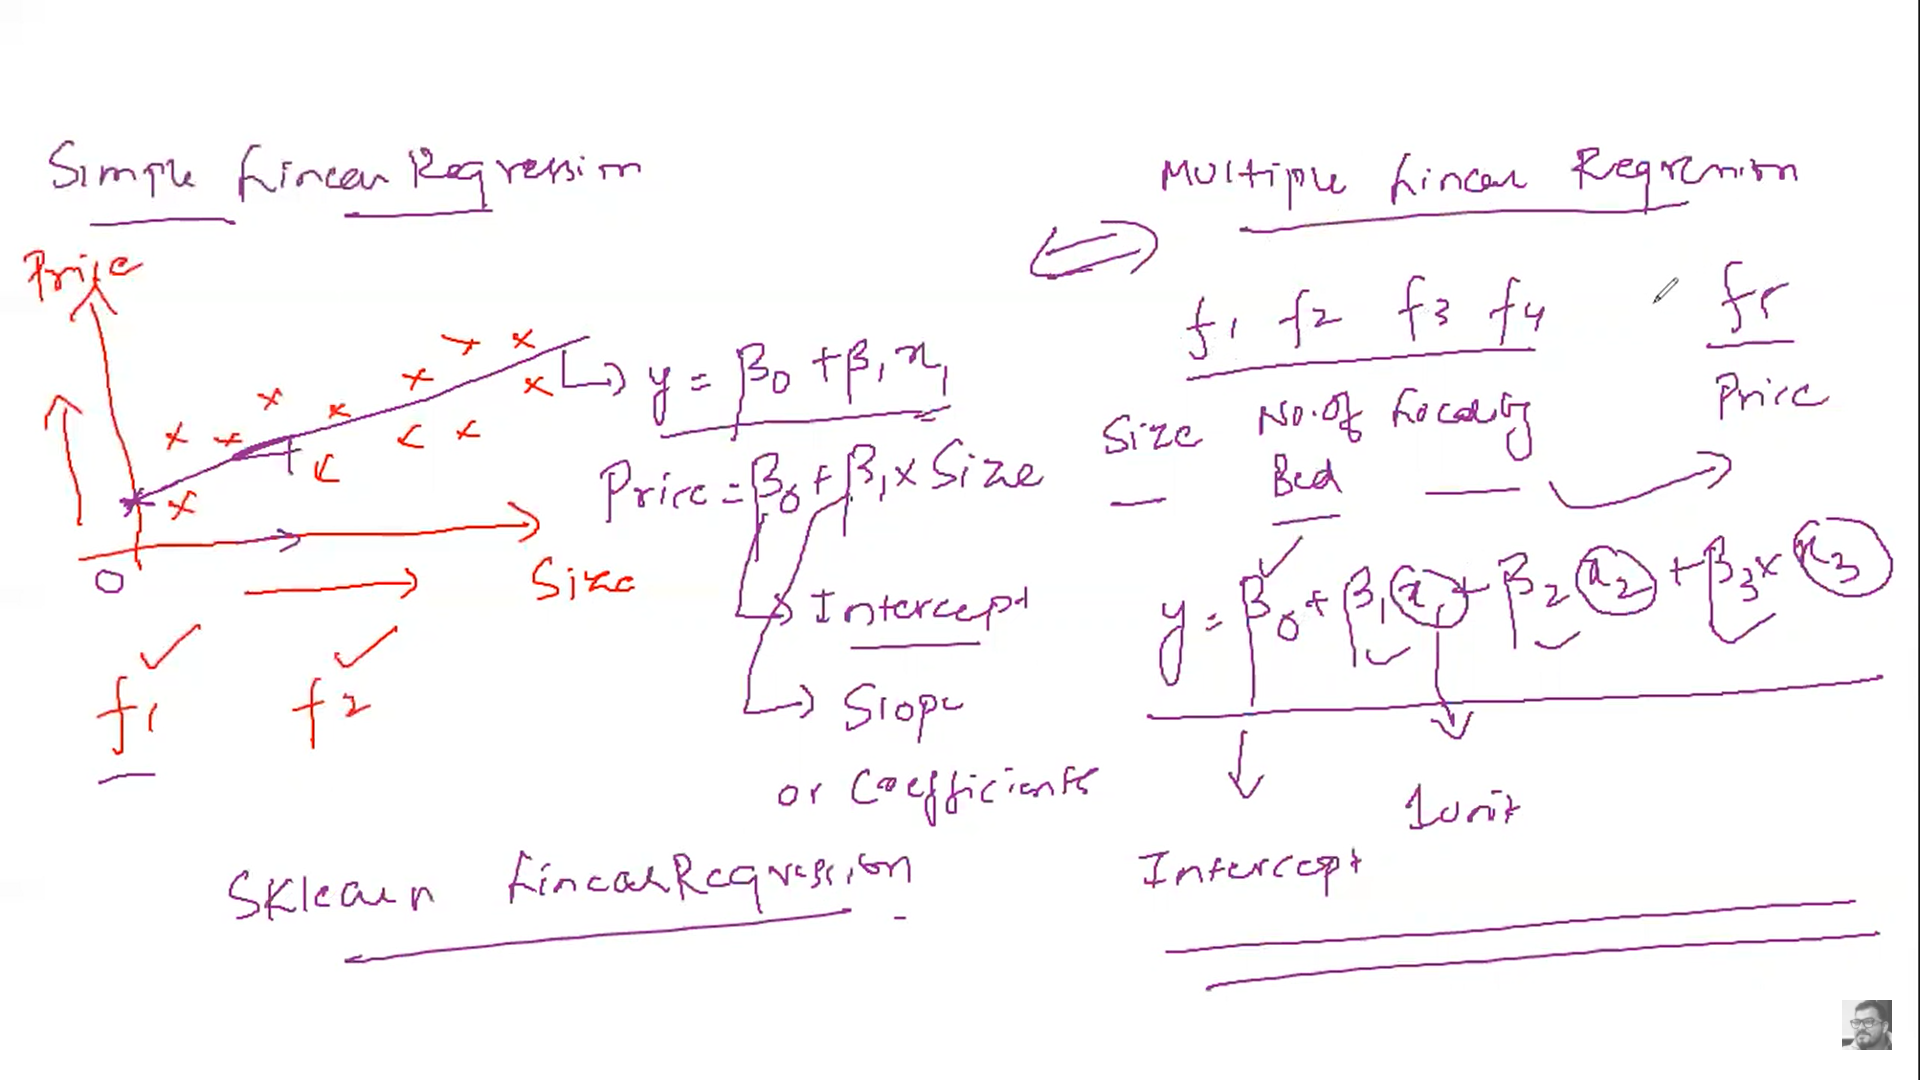


In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## import dataset
df = pd.read_csv('50_Startups.csv')


In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
X=df.iloc[:,:-1]
y=df.iloc[:,4]

In [9]:
type(X)

pandas.core.frame.DataFrame

In [10]:
## convert the column into categorical column
states= pd.get_dummies(X['State'],drop_first=True)

In [12]:
## drop the state column
X=X.drop('State',axis=1)

In [14]:
## comcat the dummy variable
X=pd.concat([X,states],axis=1)

In [23]:
## Splitting the dataset into the training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
X_test

,R&D Spend,Administration,Marketing Spend,Florida,New York
28,66051.52,182645.56,118148.20,1,0
11,100671.96,91790.61,249744.55,0,0
10,101913.08,110594.11,229160.95,1,0
41,27892.92,84710.77,164470.71,1,0
2,153441.51,101145.55,407934.54,1,0
27,72107.60,127864.55,353183.81,0,1
38,20229.59,65947.93,185265.10,0,1
31,61136.38,152701.92,88218.23,0,1
22,73994.56,122782.75,303319.26,1,0
4,142107.34,91391.77,366168.42,1,0


In [27]:
 ## Fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [28]:
y_predict = reg.predict(X_test)

In [29]:
y_predict

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [30]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [31]:
X_test

,R&D Spend,Administration,Marketing Spend,Florida,New York
28,66051.52,182645.56,118148.20,1,0
11,100671.96,91790.61,249744.55,0,0
10,101913.08,110594.11,229160.95,1,0
41,27892.92,84710.77,164470.71,1,0
2,153441.51,101145.55,407934.54,1,0
27,72107.60,127864.55,353183.81,0,1
38,20229.59,65947.93,185265.10,0,1
31,61136.38,152701.92,88218.23,0,1
22,73994.56,122782.75,303319.26,1,0
4,142107.34,91391.77,366168.42,1,0


In [32]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)

In [33]:
score

0.9347068473282423